# Evaluation method used in Classification
- Accuracy
- Confusion Matrix
- Precision
- Recall
- F1 Score
- ROC AUC

## Accuracy

Accuracy = predictions that are the same as result / all predictions

In [2]:
from sklearn.preprocessing import LabelEncoder

# Fill Null value
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)

    return df

# drop unnecessary features from dataframe
def drop_features(df):
    df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
    return df

# Encode labels
def format_features(df):
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# Call all preprocessing functions
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)

    return df

In [3]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        pred = np.zeros( (X.shape[0], 1))
        for i in range (X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1

        return pred

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('../train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test= train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=0)

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print(accuracy_score(y_test, mypredictions))

0.7877094972067039


In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class OnlyZeroClassifier(BaseEstimator):
    # No fit process
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

digits = load_digits()

y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [6]:
print("data label set shape:", y_test.shape)
print("test set label 0 and 1 counts")
print(pd.Series(y_test).value_counts())

fakeclf = OnlyZeroClassifier()
fakeclf.fit(X_train, y_train)

fakepred = fakeclf.predict(X_test)
print("Only zero prediction's accuracy: {0:.4f}".format(accuracy_score(y_test, fakepred)))

data label set shape: (450,)
test set label 0 and 1 counts
0    405
1     45
dtype: int64
Only zero prediction's accuracy: 0.9000


## Confusion Matrix

- TN: Negative predicted, actually negative
- FP: Positive predicted, actually negative
- FN: Negative predicted, actually positive
- TP: Positive predicted, actually positive

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

accuracy: (TN+TP) / (TN+FP+FN+TP)

## Precision and Recall

precision = TP / (FP + TP)
recall(Sensitivity, TRP(True Positive Rate)) = TP / (FN + TP)

What situations 'recall' can be important?
(ex) Cancer Screening: FN -> can even die, FP -> can just do re-screening
    Insurance Fraud, Financial Fraud...

What situations 'precision' can be important?
(ex) Spam mail Filtering: FP -> cannot receive important mail, FN -> just spam (trash) mail

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print("confusion matrix: \n", confusion)
    print("accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}"
          .format(accuracy, precision, recall))

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv("../train.csv")
y_titanic_df = titanic_df["Survived"]
X_titanic_df = titanic_df.drop("Survived", axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression(solver="liblinear")

lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

confusion matrix: 
 [[108  10]
 [ 14  47]]
accuracy: 0.8659, precision: 0.8246, recall: 0.7705


### predict_proba()
returns feature individual record prediction rate

In [10]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print("pred_proba() Shape:", pred_proba.shape)
print("pred_proba array", pred_proba[:])

pred_proba() Shape: (179, 2)
pred_proba array [[0.44935226 0.55064774]
 [0.86335512 0.13664488]
 [0.86429644 0.13570356]
 [0.8496852  0.1503148 ]
 [0.8234341  0.1765659 ]
 [0.84231224 0.15768776]
 [0.8709549  0.1290451 ]
 [0.27228603 0.72771397]
 [0.78185129 0.21814871]
 [0.33185996 0.66814004]
 [0.86178764 0.13821236]
 [0.87058098 0.12941902]
 [0.86425951 0.13574049]
 [0.87065945 0.12934055]
 [0.56033545 0.43966455]
 [0.85003023 0.14996977]
 [0.88954173 0.11045827]
 [0.74250732 0.25749268]
 [0.71120225 0.28879775]
 [0.23776276 0.76223724]
 [0.75684107 0.24315893]
 [0.62428169 0.37571831]
 [0.84655247 0.15344753]
 [0.82711257 0.17288743]
 [0.86825629 0.13174371]
 [0.77003828 0.22996172]
 [0.82946349 0.17053651]
 [0.90336131 0.09663869]
 [0.73372049 0.26627951]
 [0.68847388 0.31152612]
 [0.07646869 0.92353131]
 [0.2253212  0.7746788 ]
 [0.8716194  0.1283806 ]
 [0.24075417 0.75924583]
 [0.62711732 0.37288268]
 [0.77003828 0.22996172]
 [0.90554276 0.09445724]
 [0.40602575 0.59397425]
 [0.

In [11]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print("prediction \n", pred_proba_result[:])

prediction 
 [[0.44935226 0.55064774 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429644 0.13570356 0.        ]
 [0.8496852  0.1503148  0.        ]
 [0.8234341  0.1765659  0.        ]
 [0.84231224 0.15768776 0.        ]
 [0.8709549  0.1290451  0.        ]
 [0.27228603 0.72771397 1.        ]
 [0.78185129 0.21814871 0.        ]
 [0.33185996 0.66814004 1.        ]
 [0.86178764 0.13821236 0.        ]
 [0.87058098 0.12941902 0.        ]
 [0.86425951 0.13574049 0.        ]
 [0.87065945 0.12934055 0.        ]
 [0.56033545 0.43966455 0.        ]
 [0.85003023 0.14996977 0.        ]
 [0.88954173 0.11045827 0.        ]
 [0.74250732 0.25749268 0.        ]
 [0.71120225 0.28879775 0.        ]
 [0.23776276 0.76223724 1.        ]
 [0.75684107 0.24315893 0.        ]
 [0.62428169 0.37571831 0.        ]
 [0.84655247 0.15344753 0.        ]
 [0.82711257 0.17288743 0.        ]
 [0.86825629 0.13174371 0.        ]
 [0.77003828 0.22996172 0.        ]
 [0.82946349 0.17053651 0.        ]
 [0.90336131 0.

how scikit learn precision/recall designed?

In [13]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

binary = Binarizer(threshold=1.1)
print(binary.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [18]:
custom_threshold = 0.5

pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
print(pred_proba_1)

[[0.55064774]
 [0.13664488]
 [0.13570356]
 [0.1503148 ]
 [0.1765659 ]
 [0.15768776]
 [0.1290451 ]
 [0.72771397]
 [0.21814871]
 [0.66814004]
 [0.13821236]
 [0.12941902]
 [0.13574049]
 [0.12934055]
 [0.43966455]
 [0.14996977]
 [0.11045827]
 [0.25749268]
 [0.28879775]
 [0.76223724]
 [0.24315893]
 [0.37571831]
 [0.15344753]
 [0.17288743]
 [0.13174371]
 [0.22996172]
 [0.17053651]
 [0.09663869]
 [0.26627951]
 [0.31152612]
 [0.92353131]
 [0.7746788 ]
 [0.1283806 ]
 [0.75924583]
 [0.37288268]
 [0.22996172]
 [0.09445724]
 [0.59397425]
 [0.06956415]
 [0.12349479]
 [0.30202578]
 [0.10335406]
 [0.78006621]
 [0.68434288]
 [0.62057771]
 [0.62067108]
 [0.9283872 ]
 [0.44222421]
 [0.92085513]
 [0.13196917]
 [0.49209941]
 [0.12934055]
 [0.14423594]
 [0.6512987 ]
 [0.28441583]
 [0.21146796]
 [0.25380789]
 [0.13570999]
 [0.15920996]
 [0.40161935]
 [0.26467919]
 [0.11294403]
 [0.45447199]
 [0.44673658]
 [0.37416475]
 [0.11636722]
 [0.64818743]
 [0.60096648]
 [0.91699186]
 [0.14927477]
 [0.1322118 ]
 [0.16

In [20]:
binary = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binary.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

confusion matrix: 
 [[108  10]
 [ 14  47]]
accuracy: 0.8659, precision: 0.8246, recall: 0.7705


In [21]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binary = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binary.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

confusion matrix: 
 [[97 21]
 [11 50]]
accuracy: 0.8212, precision: 0.7042, recall: 0.8197


In [23]:
thresholds = [0.40, 0.45, 0.50, 0.55, 0.60]

for param in thresholds:
    custom_threshold = param
    pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
    binary = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
    custom_predict = binary.transform(pred_proba_1)

    print("*** if threshold is {0} ***".format(param))
    get_clf_eval(y_test, custom_predict)

*** if threshold is 0.4 ***
confusion matrix: 
 [[97 21]
 [11 50]]
accuracy: 0.8212, precision: 0.7042, recall: 0.8197
*** if threshold is 0.45 ***
confusion matrix: 
 [[105  13]
 [ 13  48]]
accuracy: 0.8547, precision: 0.7869, recall: 0.7869
*** if threshold is 0.5 ***
confusion matrix: 
 [[108  10]
 [ 14  47]]
accuracy: 0.8659, precision: 0.8246, recall: 0.7705
*** if threshold is 0.55 ***
confusion matrix: 
 [[111   7]
 [ 16  45]]
accuracy: 0.8715, precision: 0.8654, recall: 0.7377
*** if threshold is 0.6 ***
confusion matrix: 
 [[113   5]
 [ 17  44]]
accuracy: 0.8771, precision: 0.8980, recall: 0.7213


precision_recall_curve() API
y_true, probas_pred => precision, recall

In [26]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print("precisions:", precisions)
print("recalls:", recalls)
print("shape of returned array:", thresholds.shape)

precisions: [0.34078212 0.34269663 0.34463277 0.34659091 0.34857143 0.35057471
 0.35260116 0.35465116 0.35672515 0.35882353 0.36094675 0.36309524
 0.36526946 0.36746988 0.36969697 0.37195122 0.37423313 0.37654321
 0.37888199 0.375      0.37735849 0.37974684 0.38216561 0.37820513
 0.38064516 0.38311688 0.38562092 0.38815789 0.39072848 0.39597315
 0.40136054 0.41843972 0.42142857 0.42446043 0.43065693 0.43382353
 0.43703704 0.44029851 0.44360902 0.4469697  0.44615385 0.4496124
 0.4453125  0.44094488 0.44444444 0.44       0.44354839 0.44715447
 0.45454545 0.45833333 0.46218487 0.46610169 0.47008547 0.47413793
 0.47826087 0.48245614 0.48672566 0.49107143 0.4954955  0.5
 0.50458716 0.50925926 0.51401869 0.51886792 0.52380952 0.52884615
 0.53398058 0.53921569 0.54455446 0.55       0.55555556 0.56122449
 0.56701031 0.57291667 0.59139785 0.59782609 0.6043956  0.61111111
 0.61797753 0.625      0.63218391 0.63953488 0.64705882 0.64285714
 0.65060241 0.65853659 0.66666667 0.675      0.6835443  0.

In [27]:
thr_index = np.arange(0, thresholds.shape[0], 15)
print("10 indexes:", thr_index)
print("sample's threshold:", np.round(thresholds[thr_index], 2))

10 indexes: [  0  15  30  45  60  75  90 105 120 135 150]
sample's threshold: [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]


In [28]:
print("precision:", np.round(precisions[thr_index], 3))
print("recall", np.round(recalls[thr_index], 3))

precision: [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
recall [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


In [49]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle="--", label="precision")
    plt.plot(thresholds, recalls[0:threshold_boundary], label="recall")

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel("Threshold value")
    plt.ylabel("Precision and Recall Value")
    plt.legend()
    plt.grid()

    plt.show()


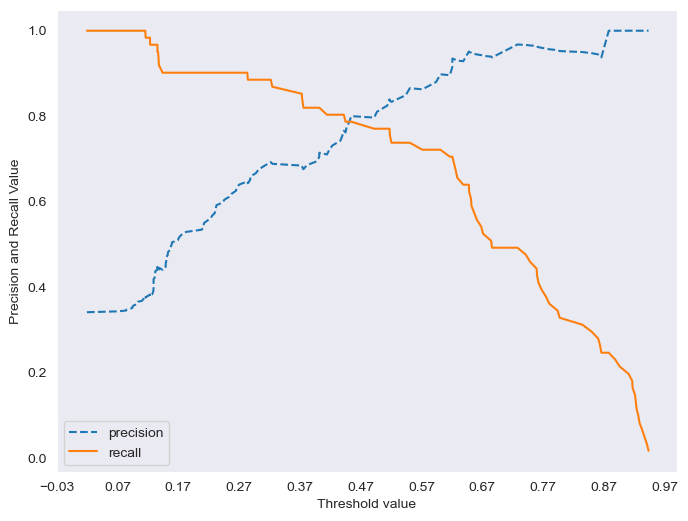

In [50]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

### some fatal problems
how to make precision 100%:
    just predict a positive outcome if you are 100% sure
how to make recall 100%:
    just make all predict to positive

## F1 Score
combines precision and recall

In [51]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print("F1 Score: {0:.4f}".format(f1))

F1 Score: 0.7966


In [53]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print("confusion matrix: \n", confusion)
    print("accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}"
          .format(accuracy, precision, recall, f1))

thresholds = [0.40, 0.45, 0.50, 0.55, 0.60]

for param in thresholds:
    custom_threshold = param
    pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
    binary = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
    custom_predict = binary.transform(pred_proba_1)

    print("*** if threshold is {0} ***".format(param))
    get_clf_eval(y_test, custom_predict)

*** if threshold is 0.4 ***
confusion matrix: 
 [[97 21]
 [11 50]]
accuracy: 0.8212, precision: 0.7042, recall: 0.8197, f1: 0.7576
*** if threshold is 0.45 ***
confusion matrix: 
 [[105  13]
 [ 13  48]]
accuracy: 0.8547, precision: 0.7869, recall: 0.7869, f1: 0.7869
*** if threshold is 0.5 ***
confusion matrix: 
 [[108  10]
 [ 14  47]]
accuracy: 0.8659, precision: 0.8246, recall: 0.7705, f1: 0.7966
*** if threshold is 0.55 ***
confusion matrix: 
 [[111   7]
 [ 16  45]]
accuracy: 0.8715, precision: 0.8654, recall: 0.7377, f1: 0.7965
*** if threshold is 0.6 ***
confusion matrix: 
 [[113   5]
 [ 17  44]]
accuracy: 0.8771, precision: 0.8980, recall: 0.7213, f1: 0.8000


## ROC Curve and AUC Score

이진 분류의 예측 성능 측정에서 중요

### ROC Curve (Receiver Operation Characterisric Curve)

FPR(False Positive Rate) 대비 TPR(True Positive Rate, recall) 변화율 곡선

- TPR: Positive 예측의 정확도
- TNR(특이성): Negative 예측의 정확도
    - TNR = TN / (FP + TN)
- FPR = FP / (FP + TN) = 1 - TNR = 1 - Specificity

FPR 을 0~1 변화시키며 TPR 의 변화값 관찰

roc_curve(y_true, y_score) ⇒ fpr, tpr, thresholds
y_true: 실제 class array
y_score: predict_proba(positive)
fpr: FPR value
tpr: TPR value
thresholds: threshold array

In [55]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
print("thresholds:", thresholds)
# 5 step threshold, thresholds[0] is set to max(prob) + 1, so np.arange starts with 1
thr_index = np.arange(1, thresholds.shape[0], 5)

thresholds: [1.94326279 0.94326279 0.94040085 0.93261004 0.87778554 0.86565305
 0.72771397 0.68584875 0.64779432 0.63856712 0.62629698 0.62067108
 0.61651658 0.60096648 0.57135186 0.55064774 0.5205172  0.51724751
 0.49209941 0.45447199 0.44497249 0.44222421 0.41445141 0.40194454
 0.37571831 0.32202995 0.28441583 0.283459   0.23280097 0.22996172
 0.14927477 0.14927302 0.14423594 0.13866562 0.13821236 0.13664488
 0.13574049 0.13570999 0.13196917 0.13174371 0.12941902 0.12934055
 0.1290451  0.12350957 0.12349479 0.11636722 0.11573102 0.01974988]


In [58]:
print(thr_index)
print("thresholds:", np.round(thresholds[thr_index], 2))
print("fprs:", np.round(fprs[thr_index], 3))
print("tprs:", np.round(tprs[thr_index], 3))

[ 1  6 11 16 21 26 31 36 41 46]
thresholds: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
fprs: [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
tprs: [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


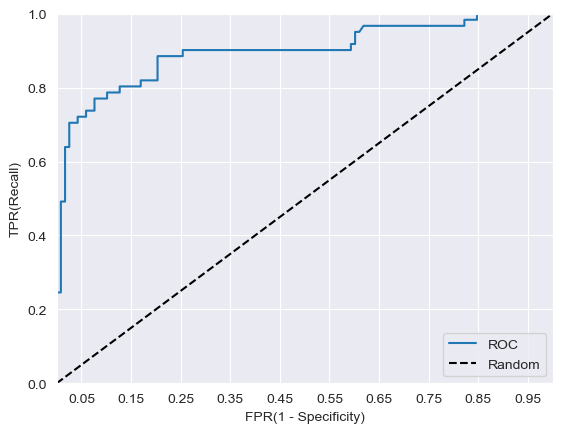

In [59]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label="ROC")
    plt.plot([0, 1], [0, 1], "k--", label="Random")

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel("FPR(1 - Specificity)")
    plt.ylabel("TPR(Recall)")
    plt.legend()

roc_curve_plot(y_test, pred_proba[:, 1])

AUC Score: dimension of ROC Curve
(closer to 1 is better)

In [60]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print("AUC Score: {0:.4f}".format(roc_score))

AUC Score: 0.8987


In [61]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print("confusion matrix: \n", confusion)
    print("accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}, ROC-AUC: {4:.4f}"
          .format(accuracy, precision, recall, f1, roc_auc))